In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import Holt



dataset = pd.read_csv('exchange-rates_phl.csv', comment='#')
dataset = dataset[710::]




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     367.8
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           3.07e-25
Time:                        00:03:32   Log-Likelihood:                -175.70
No. Observations:                  54   AIC:                             355.4
Df Residuals:                      52   BIC:                             359.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2102.4414    111.270    -18.895      0.0

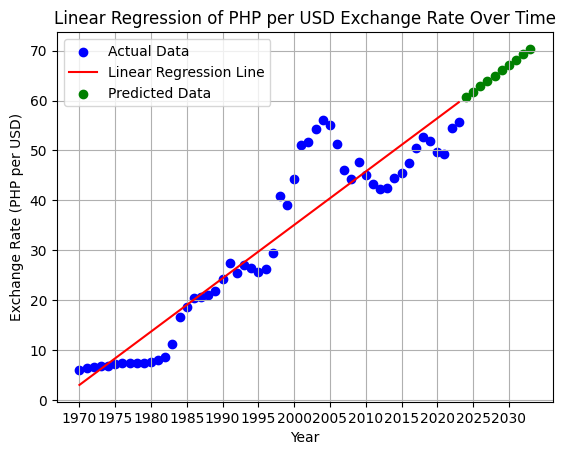

In [72]:
#Regression

df = pd.DataFrame(dataset)

X = df['Year'].values.reshape(-1, 1)  
y = df['Value'].values  

# use library with built-in desc statistics
X_with_intercept = sm.add_constant(X)

# use library with built-in desc statistics
model_sm = sm.OLS(y, X_with_intercept).fit()

p_values = model_sm.pvalues

# model summary
print(model_sm.summary())

model = LinearRegression()


model.fit(X, y)

# predictions for next 10 years
future_years = np.arange(2024, 2034).reshape(-1, 1)
predictions = model.predict(future_years)
y_pred = model.predict(X)

coefficient = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# summary of desc statistics
print(f"Coefficient (Slope): {coefficient:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

for year, prediction in zip(future_years.flatten(), predictions):
    print(f"Predicted exchange rate for {year}: {prediction:.2f} PHP per USD")

# regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression Line')

#  plot the future predictions
plt.scatter(future_years, predictions, color='green', label='Predicted Data')

# show every 5 years
plt.xticks(np.arange(1970, 2034, 5))  

plt.xlabel('Year')
plt.ylabel('Exchange Rate (PHP per USD)')
plt.title('Linear Regression of PHP per USD Exchange Rate Over Time')

plt.legend()
plt.grid(True)
plt.show()

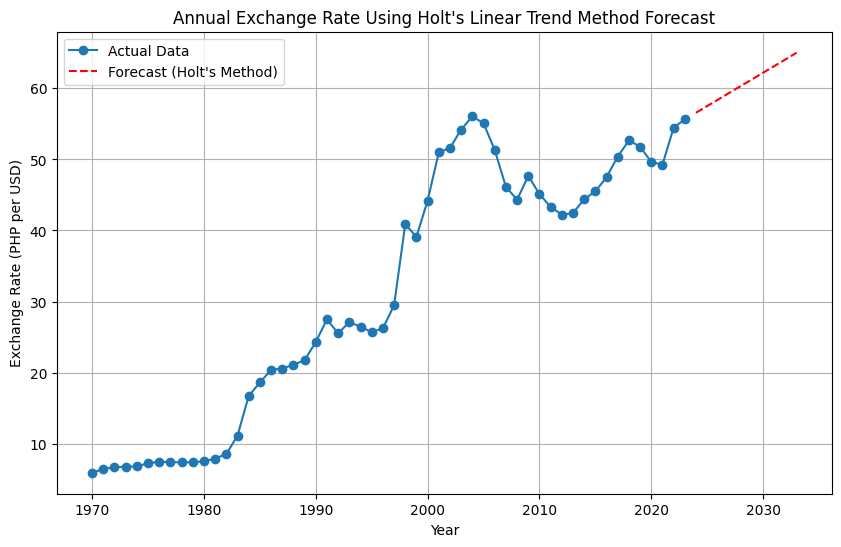

                 Year  Forecasted Value
2024-01-01 2024-01-01         56.568593
2025-01-01 2025-01-01         57.506823
2026-01-01 2026-01-01         58.445053
2027-01-01 2027-01-01         59.383283
2028-01-01 2028-01-01         60.321513
2029-01-01 2029-01-01         61.259743
2030-01-01 2030-01-01         62.197973
2031-01-01 2031-01-01         63.136202
2032-01-01 2032-01-01         64.074432
2033-01-01 2033-01-01         65.012662
Mean Absolute Error (MAE): 1.8688
Mean Squared Error (MSE): 6.9551
Root Mean Squared Error (RMSE): 2.6372
Akaike Information Criterion (AIC): 112.7314
Bayesian Information Criterion (BIC): 120.6873
R-squared: 0.9780


In [73]:
df = pd.DataFrame(dataset)


df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
df = df.asfreq('YS')  

holt_model = Holt(df['Value'], initialization_method='estimated').fit()

# predict the next 10 years
future_years = pd.date_range(start='2024', end='2033', freq='YS')  # Year-Start frequency
forecast = holt_model.forecast(len(future_years))

# combine actual and forecasted values
forecast_df = pd.DataFrame({
    "Year": future_years,
    "Forecasted Value": forecast
})

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label="Actual Data", marker='o')
plt.plot(future_years, forecast, label="Forecast (Holt's Method)", linestyle='--', color='red')
plt.xlabel("Year")
plt.ylabel("Exchange Rate (PHP per USD)")
plt.title("Annual Exchange Rate Using Holt's Linear Trend Method Forecast")
plt.legend()
plt.grid(True)
plt.show()

print(forecast_df)

actual_values = df['Value']
forecasted_values = holt_model.fittedvalues

y_mean = np.mean(actual_values)

# total sum of squares (TSS)
tss = np.sum((actual_values - y_mean) ** 2)

# residual sum of squares (RSS)
rss = np.sum((actual_values - forecasted_values) ** 2)

r_squared = 1 - (rss / tss)

# Mean Absolute Error
mae = mean_absolute_error(actual_values, forecasted_values)

# Mean Squared Error 
mse = mean_squared_error(actual_values, forecasted_values)

# Root Mean Squared Error 
rmse = np.sqrt(mse)

# AIC and BIC (Akaike and Bayesian Information Criterion)
aic = holt_model.aic
bic = holt_model.bic

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Akaike Information Criterion (AIC): {aic:.4f}")
print(f"Bayesian Information Criterion (BIC): {bic:.4f}")
print(f"R-squared: {r_squared:.4f}")